##Goal:
Read a $\texttt{.shp}$ file full of lines and plot them using $\texttt{fiona}$, $\texttt{shapely}$, and $\texttt{matplotlib}$

##Steps:
#### 1. Read a $\texttt{.shp}$ file using $\texttt{fiona}$ package and discover what is in each row.
#### 2. Plot all the line strings using $\texttt{shapely}$ and $\texttt{matplotlib}$.
#### 3. Create a function

#### Read a $\texttt{.shp}$ file using $\texttt{fiona}$ package and discover what is in each row:

In [1]:
import fiona
with fiona.open('./Local-Data/2015_07_15_small_region.shp', 'r') as inputfile:
    for row in inputfile:
        print row
        break

{'geometry': {'type': 'LineString', 'coordinates': [(548174.7687999997, 5281802.852), (548172.4803999998, 5281802.832599999), (547982.5483999997, 5281801.2202)]}, 'type': 'Feature', 'id': '0', 'properties': OrderedDict()}


Thus,
* Each row in $\texttt{Export_output.shp}$ is a $\texttt{LineString}$ including at least two points.
* Coordinates of these points are stored in a list under $\texttt{'coordinates'}$ as $(x, y)$ in meters.

#### Plot all the line strings using $\texttt{shapely}$ and $\texttt{matplotlib}$:

* Define a function to plot a Line using $\texttt{shapely}$
* Handle Axes Limit stuff.

In [2]:
import shapely 
# function: plots one line (not a lineList) with first and last points with different colors
def plot_line(ax, line):
    #line = [(x, y),...]
    x, y = LineString(line).xy
    # plot lines between points
    ax.plot(x, y, color="#C885CD", alpha=0.7, linewidth=1, solid_capstyle='round', zorder=1)
    # Plot first and last points with different colors
#     ax.plot(x[0], y[0], 'o', color='#80F222', zorder=2)
#     ax.plot(x[-1], y[-1], 'o', color='#F22222', zorder=2)
    
# function: handle axes limits and title of a plot of a (lineList 
def handle_axesLimTitle_for_lineList(ax, lineList, title):
    #lineList = [line1, ...]
    allXList = []
    allYList = []
    for line in lineList:
        for point in line:
            allXList.append(point[0])
            allYList.append(point[1])
    XLim = [min(allXList), max(allXList)]
    YLim = [min(allYList), max(allYList)]
    XEmptySpace = int((XLim[1]-XLim[0])/5.0)
    YEmptySpace = int((YLim[1]-YLim[0])/5.0)
    if XEmptySpace == 0:
        XEmptySpace = 1
    if YEmptySpace == 0:
        YEmptySpace = 1
    Xrange = [int(XLim[0]) - XEmptySpace, int(XLim[1]) + XEmptySpace]
    Yrange = [int(YLim[0]) - YEmptySpace, int(YLim[1]) + YEmptySpace]
    ax.set_xlim(*Xrange)
    ax.set_ylim(*Yrange)
    # ax.set_yticks(list(range(*Yrange)) + [Yrange[-1]])
    # ax.set_aspect(1)
    ax.set_title(title) 

* Put coordinates of a all lines in a list: $\texttt{lineStringList} = [\; [\texttt{$L_1$}],\; [\texttt{$L_2$}],\; [\texttt{$L_3$}],\; \cdot\cdot\cdot]$

In [3]:
with fiona.open('./Local-Data/2015_07_15_small_region.shp', 'r') as input:
    lineList = []
    for row in input:
        lineList.append(row['geometry']['coordinates'])    

* Get the coordinates from $\texttt{l𝚒𝚗𝚎List}$ and plot them using $\texttt{matplotlib}$

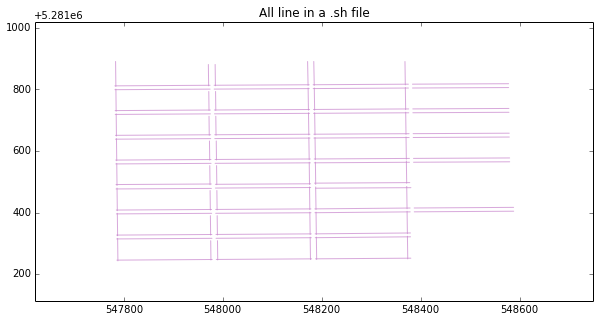

In [4]:
from shapely.geometry import LineString
from matplotlib import pyplot
%matplotlib inline

fig = pyplot.figure(1, figsize=(10,5), dpi=90)
ax = fig.add_subplot(111)
for line in lineList:
    plot_line(ax, line)
handle_axesLimTitle_for_lineList(ax, lineList, "All line in a .sh file")
        
pyplot.show()

#### Create a clean function:
* input: .shp file full of Lines in form of list of tuples 
* output: Plot all lines

In [7]:
def plot_lines_in_shapefile(shapeFile):
    with fiona.open(shapeFile, 'r') as input:
        lineList = []
        for row in input:
        # Depending on file structure this line might change
            lineList.append(row['geometry']['coordinates'])
        fig = pyplot.figure(1, figsize=(10,5), dpi=90)
        ax = fig.add_subplot(111)
        for line in lineList:
            plot_line(ax, line)
        handle_axesLimTitle_for_lineList(ax, lineList, "All line in a .sh file")

## Code:
### a) Functions:

In [8]:
import fiona
import shapely
from shapely.geometry import LineString
from matplotlib import pyplot
%matplotlib inline

# function: plots one line (not a lineList) with first and last points with different colors
def plot_line(ax, line):
    #line = [(x, y),...]
    x, y = LineString(line).xy
    # plot lines between points
    ax.plot(x, y, color="#C885CD", alpha=0.7, linewidth=1, solid_capstyle='round', zorder=1)
    # Plot first and last points with different colors
#     ax.plot(x[0], y[0], 'o', color='#80F222', zorder=2)
#     ax.plot(x[-1], y[-1], 'o', color='#F22222', zorder=2)
    
# function: handle axes limits and title of a plot of a (lineList 
def handle_axesLimTitle_for_lineList(ax, lineList, title):
    #lineList = [line1, ...]
    allXList = []
    allYList = []
    for line in lineList:
        for point in line:
            allXList.append(point[0])
            allYList.append(point[1])
    XLim = [min(allXList), max(allXList)]
    YLim = [min(allYList), max(allYList)]
    XEmptySpace = int((XLim[1]-XLim[0])/5.0)
    YEmptySpace = int((YLim[1]-YLim[0])/5.0)
    if XEmptySpace == 0:
        XEmptySpace = 1
    if YEmptySpace == 0:
        YEmptySpace = 1
    Xrange = [int(XLim[0]) - XEmptySpace, int(XLim[1]) + XEmptySpace]
    Yrange = [int(YLim[0]) - YEmptySpace, int(YLim[1]) + YEmptySpace]
    ax.set_xlim(*Xrange)
    ax.set_ylim(*Yrange)
    # ax.set_yticks(list(range(*Yrange)) + [Yrange[-1]])
    # ax.set_aspect(1)
    ax.set_title(title) 
def plot_lines_in_shapefile(shapeFile):
    with fiona.open(shapeFile, 'r') as input:
        lineList = []
        for row in input:
        # Depending on file structure this line might change
            lineList.append(row['geometry']['coordinates'])
        fig = pyplot.figure(1, figsize=(10,5), dpi=90)
        ax = fig.add_subplot(111)
        for line in lineList:
            plot_line(ax, line)
        handle_axesLimTitle_for_lineList(ax, lineList, "All line in a .sh file")

### b) main code:

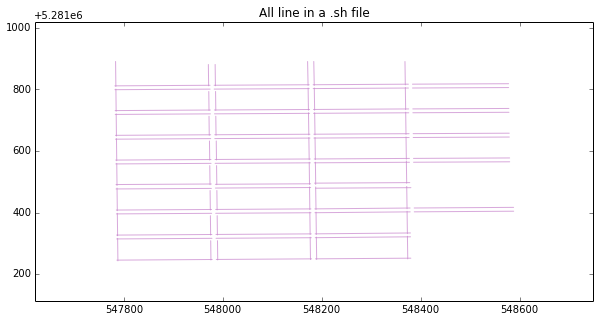

In [9]:
plot_lines_in_shapefile('./Local-Data/2015_07_15_small_region.shp')
pyplot.show()